In [38]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [16]:
df = pd.read_csv('merged_temp_ghg.csv', index_col=0)
df

,CountryCode,Month,Year,tmpf,dwpf,mslp,sknt,feel,relh,ice_accretion_6hr,p01i,Methane Levels,CO2 Levels,NO Levels
0,AE,1,1998,65.458763,56.045068,1018.097921,6.545845,65.486669,73.471497,NaN,NaN,1806.199585,366.751877,313.954544
1,AE,2,1998,68.562623,54.735838,1016.853637,7.247619,68.508641,64.828713,NaN,NaN,1805.311157,367.808334,313.976395
2,AE,3,1998,75.013693,57.406706,1014.256000,7.266628,74.756180,59.583567,NaN,NaN,1803.840637,368.712509,314.042526
3,AE,4,1998,82.306805,58.289718,1010.446900,7.312550,82.352514,49.981098,NaN,NaN,1799.752197,369.476974,314.056015
4,AE,5,1998,90.308306,60.247751,1006.463388,6.752338,91.290631,42.404219,NaN,NaN,1792.533752,369.468079,314.104630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85796,ZW,8,1980,64.313430,40.553678,NaN,7.837230,63.903915,46.814242,NaN,NaN,1551.226420,338.093353,300.827647
85797,ZW,9,1980,70.603867,48.065622,NaN,7.750000,69.999493,51.427548,NaN,NaN,1554.462809,337.946060,300.946615
85798,ZW,10,1980,74.283110,50.029111,NaN,7.964381,73.499443,49.129371,NaN,NaN,1555.922282,338.084656,301.053665
85799,ZW,11,1980,75.160548,58.477686,NaN,6.815789,74.986621,60.902681,NaN,NaN,1555.488851,338.430725,301.167811


In [357]:
countries = ['ER', 'AZ', 'BO', 'CG', 'GH','CO', 'ID','JM', 'MZ', 'TZ', 'SD', 'PE', 'ZW', 'PK']
country = countries[2]
country = 'CH'
month = 4

In [358]:
# len(df_jan)

In [359]:
df_month = df.loc[(df['CountryCode'] == country) & (df['Month'] == month)].sort_values(by='Year')
y = df_month['tmpf'].values
# y

In [360]:
model=ARIMA(y, order=(12,2,2))
model_fit = model.fit()

/Users/omkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [361]:
y_pred = model_fit.forecast(steps=15)
y_final = np.append(y, y_pred)

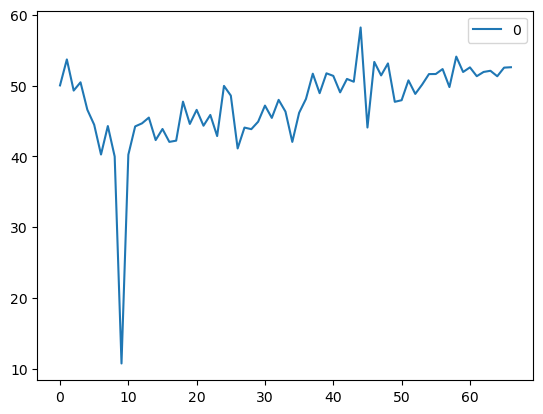

In [362]:
pd.DataFrame(y_final).plot()
plt.show()